# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:

**RA**: 


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [3841]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [3842]:
# mostrar todas as colunas
pd.set_option("display.max_columns", None)

#### No bloco abaixo, estou carregando o conjunto de dados de treino e o juntando com suas respectivas classificações, afim de usa-los para treinar o modelo.

In [3843]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")

train_data = data.merge(train_data, on="Id", how="right")

display(train_data)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,19.0,11/07/05,13/12/99,5.79,SB,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
1,17249,32.0,0,NaN,12/02/04,10/06/92,12.11,GS,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,Masculino,5 - Parecer cardiológico,NaN,Anormal
2,4483,13.0,87,17.0,22/12/03,05/11/01,2.21,SulAmerica,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,100,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
3,6830,11.0,0,NaN,11/12/06,26/05/05,1.6,SA,Normais,NaN,NaN,Não Calculado,Normal,ausente,100,NaN,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica,Normal
4,11652,42.4,136,23.0,23/03/01,03/03/01,0.06,NaN,Normais,100.0,60.0,Não Calculado,Normal,ausente,78,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,16822,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN,Indeterminado,NaN,NaN,NaN
14723,3249,30.0,113,23.0,17/05/06,01/08/01,4.97,Medial,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,sistólico,92,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
14724,3207,25.8,130,15.0,03/12/09,07/07/02,7.69,CAMED,Normais,90.0,55.0,Normal,Normal,ausente,78,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Normal
14725,4336,19.0,0,NaN,12/06/08,03/05/05,3.23,NaN,Normais,100.0,50.0,Não Calculado,Normal,ausente,100,Assintomático,NaN,M,5 - Parecer cardiológico,NaN,Normal


#### Após carregas os dados, iremos fazer uma breve análise do que cada uma das colunas representa.

* Peso: representa o peso, em Kg, de cada indivíduo.

* Altura: representa a altura, em cm, de cada indivíduo.

* IMC: representa o índice de massa corporal do paciente, índice que representa se o paciente estáem seu peso ideal ou não. É calculado pelo peso (em metros) dividido pela altura elevada ao quadrado.

* Atendimento: indica a data em que foi feito o atendimento do paciente.

* DN: data em que a declaração de nascido vivo do paciente foi escrita.

* Idade: representa a idade do paciente, sendo os anos representados por um valor real.

* Convênio: Indica qual o convênio do cliente.

* Pulsos: Indica a qualidade da circulação arterial. Pulsos fracos ou ausentes podem sugerir problemas como obstrução arterial ou insuficiência cardíaca.

* PA Sistolica: valor mais alto (medido em mmHg) que aparece durante uma aferição de pressão. Representa a pressão exercida nas artérias durante a contração do coração (sístole). Valores elevados indicam hipertensão arterial, enquanto valores muito baixos podem sugerir hipotensão.

* PA Diastolica: valor mais baixo (medido em mmHg) que aparece durante uma aferição de pressão. Reflete a pressão arterial durante o relaxamento do coração (diástole). É usada junto com a PA sistólica para diagnosticar hipertensão.

* PPA (Pressão de Pulso Arterial): Diferença entre a pressão arterial sistólica e diastólica. Indica a rigidez arterial. Valores elevados podem estar associados a doenças cardiovasculares.

* B2: Segundo Ruído Cardíaco, representa o som do fechamento das válvulas aórtica e pulmonar. 

* Sopro: Presença de ruídos anormais detectados durante a ausculta cardíaca. 

* FC (Frequência Cardíaca): número de batimentos cardíacos por minuto (bpm). Frequências muito altas (taquicardia) ou baixas (bradicardia) podem indicar problemas cardíacos.

* HDA1 (Histórico de doenças atual 1): informações detalhadas sobre o principal problema clínico atual.

* HDA2 (Histórico de doenças atual 2): informações adicionais sobre o problema clínico ou outras condições associadas.

* Sexo: genêro biológico do paciente.

* Motivo 1: principal razão para a consulta.

* Motivo 2: razão secundária para a consulta.

#### Após entender o que cada coluna significa, iremos plotar os gráficos de cada atributo relevante em relação a classe, para ver como eles se relacionam. Iremos começas por atributos não numéricos.

Plot da distribuição de Pulsos em relação as classes.

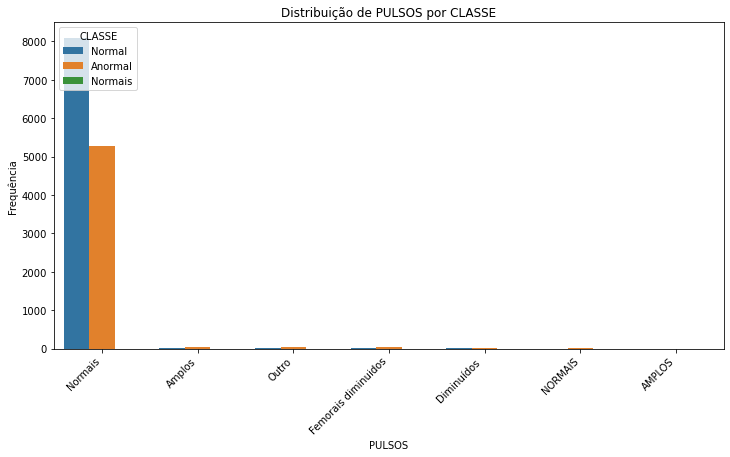

In [3844]:
plotar_grafico_barras(train_data, "PULSOS", "CLASSE")

<small>A partir dessa visualizaçao, é possível obervar que as quase 100% das amostras foram registradas com pulsos normais. Além disso obeserva-se a necessidade de paronizar os valores durante a etapa de pré-processamento, pois há valores diferentes que representam a mesma coisa.</small>

Plot da distribuição de diferentes PPA(s) em relação à classe.

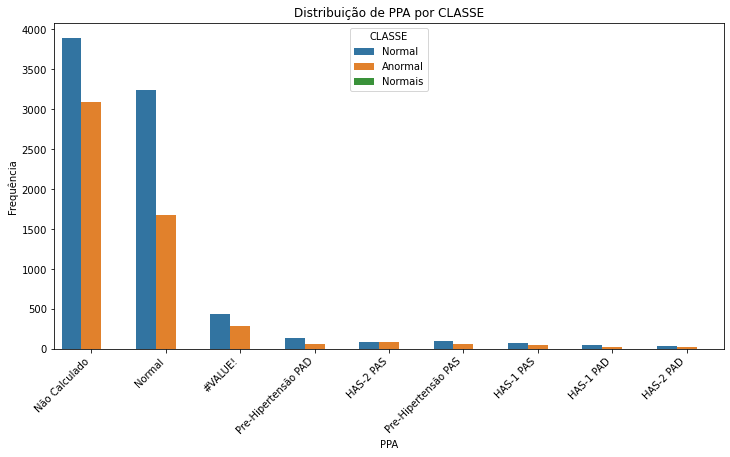

In [3845]:
plotar_grafico_barras(train_data, "PPA", "CLASSE")

<small>A partir do gráfico, é evidente a predominância das amostras com valores 'Normal' e também a grande quantidade de dados ausentes, como vistos em 'Não Calculado' e '#VALUE!'</small>

Plot da distribuição B2 em relação à classe.

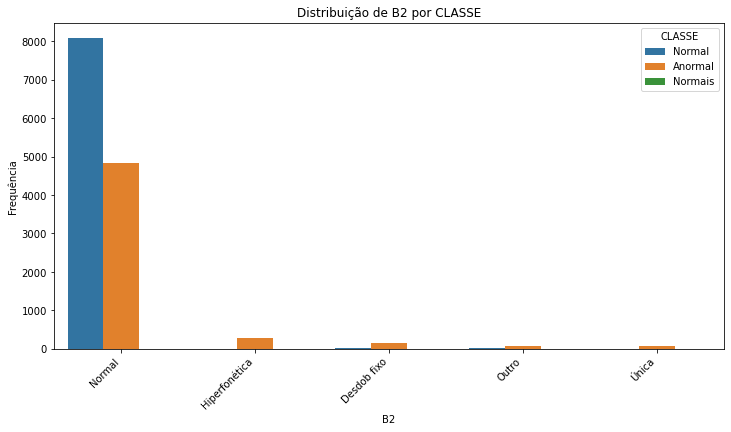

In [3846]:
plotar_grafico_barras(train_data, "B2", "CLASSE")

<small>É evidente a predominância de 'Normal'</small>

Plot da distribuição sopro em relação à classe.

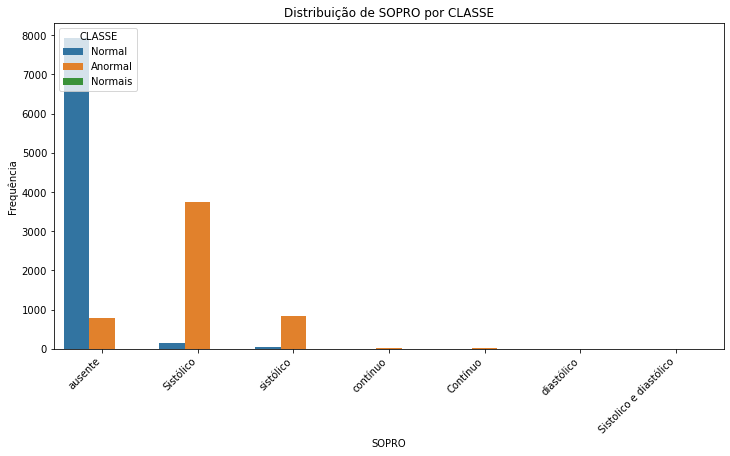

In [3847]:
plotar_grafico_barras(train_data, "SOPRO", "CLASSE")

<small>Há duas principais observações a serem feitas neste gráfico, a primeira é a necessidade de padronizar os mesmos valores que possuem nomenclaturas diferentes, como Contínuo e contínuo. A segunda, mais interessante, é a grande quantidade de pacientes 'anormais' que possuem Sistólico como valor, acima de 90%. Isso indica a importância do atributo 'SOPRO' para o treinamento do modelo.</small>

Plot da distribuição HDA1 (Histórico de doenças atual 1) em relação à classe.

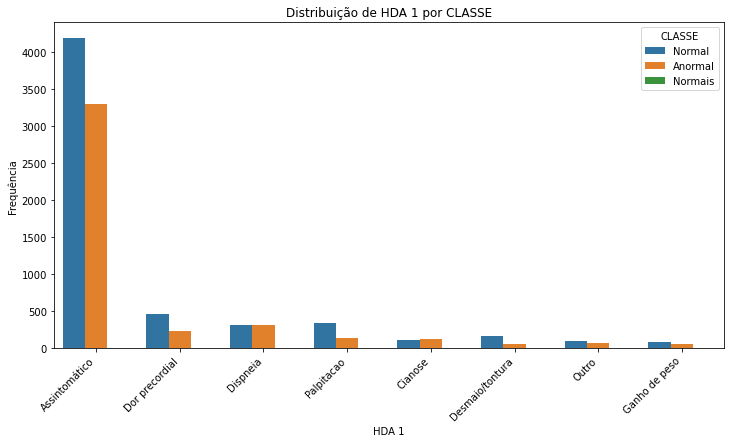

In [3848]:
plotar_grafico_barras(train_data, "HDA 1", "CLASSE")

<small>De acordo com o gráfico acima, a grande maioria das amostras corresponde à valores 'Assintonático'. Além disso, é necessário tratar 'Normais' para 'Normal' afim de padronizar.</small>

Plot da distribuição HDA2 (Histórico de doença atual 2) em relação à classe.

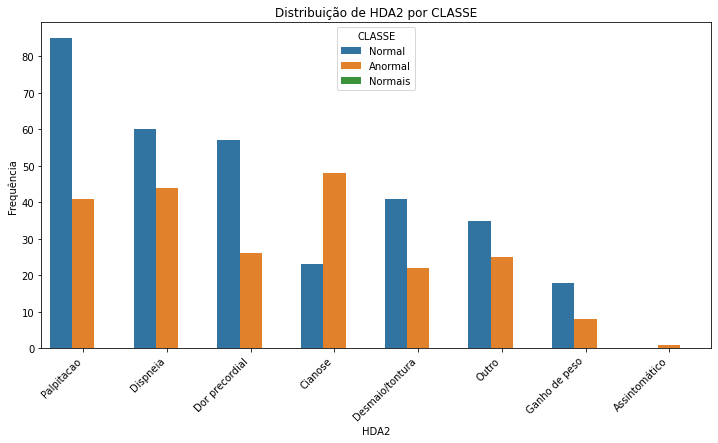

In [3849]:
plotar_grafico_barras(train_data, "HDA2", "CLASSE")

<small>De pontos importantes obtidos a partir do gráfico acima, pode-se destacar que grande parte dos pacientes que possuem dispneia ou cianose possuem alguma anormalidade. Não apenas ele, mas todos os valores possuem números consideráveis de pacientes com anormalidades, tornando 'HDA2' um atributo que deve ser tratado com atenção especial. Além disso, também é preciso padronizar 'Normais' e 'Normal'.</small>

Plot da distribuição Sexo em relação à classe.

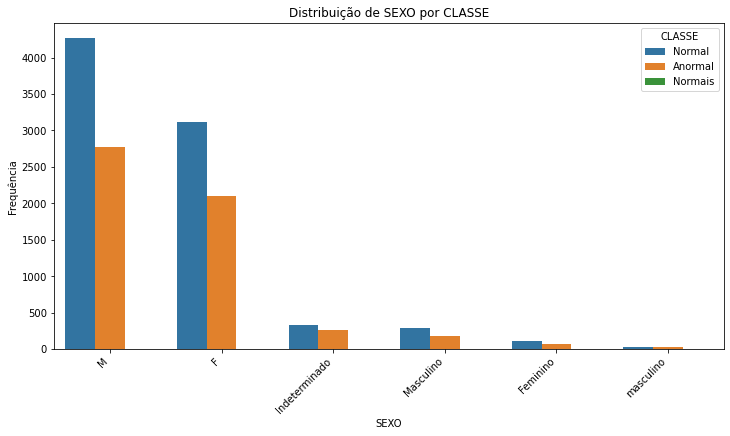

In [3850]:
plotar_grafico_barras(train_data, "SEXO", "CLASSE")

<small>Pontos importantes obtidos pelo gráfico acima: a quantidade de homens na amostra é maior que a quantidade de mulheres, porém a proporção entre homens normais e anormais, é a mesma que entre mulheres normais e mulheres anormais, cerca de 40% anormais e 60% normais. Essa análise pode singinicar que o atributo não impactara tanto no modelo, visto que a proporção não varia de genêro para genêro, após a etapa de pré-processamento será aplicado um <strong>teste de qui-quadrado</strong> entre a classe e o sexo, afim e determinar a relevância do atributo, porém será mantido por hora. Além disso, é preciso padronizar os valores como 'M' e 'Masculino'</small>

Plot da distribuição MOTIVO1 em relação à classe.

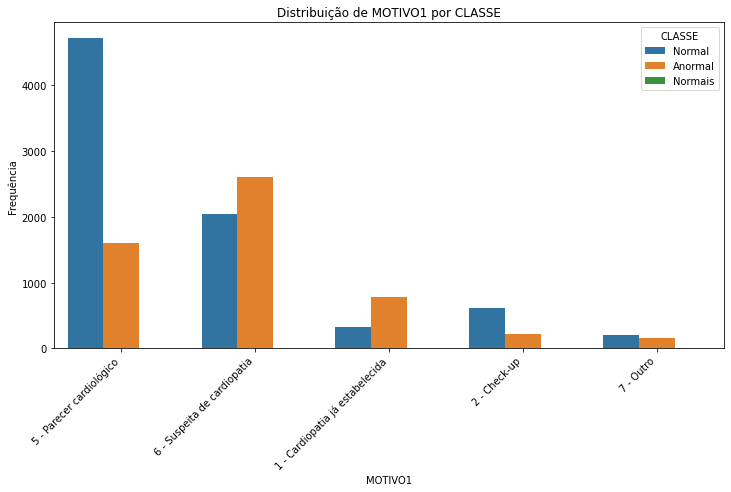

In [3851]:
plotar_grafico_barras(train_data, "MOTIVO1", "CLASSE")

<small>A partir do gráfico, é possível observar que a maioria dos casos que possuem 'Suspeita de cardiopatia' e 'Cardiopatia já estabelecida' tem alguma anormalidade. Tornando assim o atributo 'MOTIVO1' um atributo importante para o treinamento do modelo.</small>

Plot da distribuição MOTIVO2 em relação à classe.

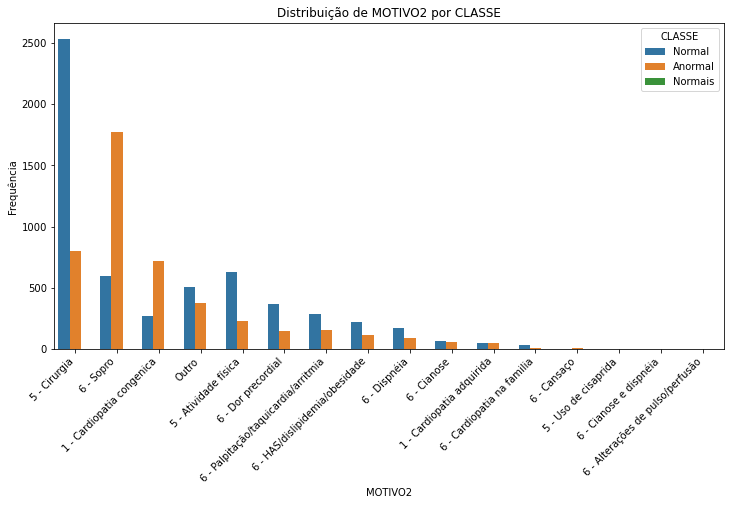

In [3852]:
plotar_grafico_barras(train_data, "MOTIVO2", "CLASSE")

<small>O gráfico mostra que há diversos valores diferentes, o que pode ser algo a ser pré-processado na próxima etapa. Além disso, vale falar sobre a grande quantidade de pacientes anormais que tem Sopro e Cardiopatia congenica como valor</small>

#### Agora iremos fazer o plot e a análise dos valores numéricos.

Mas primeiro, iremos realizar uma etapa do pré-processamento, pois há duas colunas numéricas, FC e IDADE, que são do tipo String, mas é preciso converte-las para numérica afim de realizar as plotagens.

In [3853]:
converter_numeric(train_data, "FC")
converter_numeric(train_data, "IDADE")

Com os valores convertidos, agora podemos plotar os boxplots em relação à classe para visualizar outliners

Plotar boxplot do peso em relação as classes

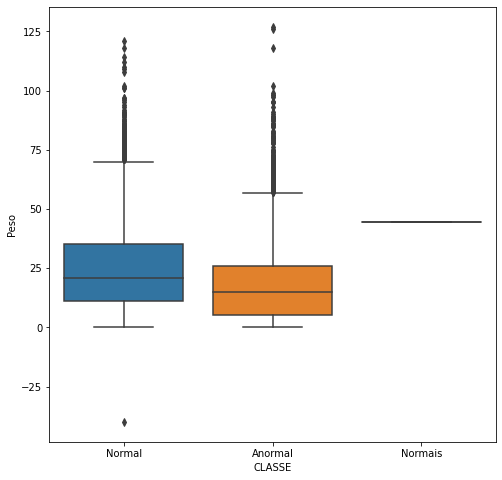

In [3854]:
plotar_boxplot(train_data, "Peso", "CLASSE")

<small> A partir da plotagem, é posível perceber que há grande quantidade de outliers, sendo necessário tratá-los na etapa de pré-processamento</small>

Plotar boxplot da altura em relação as classes

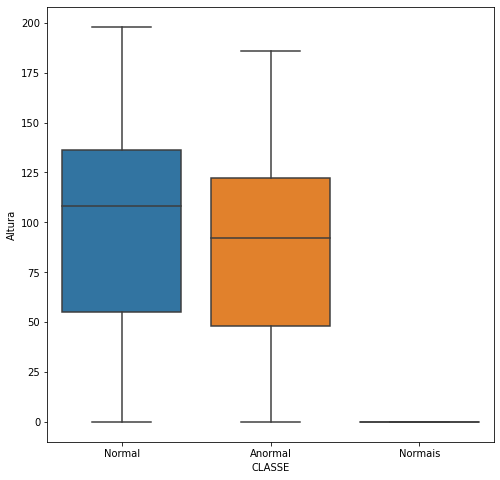

In [3855]:
plotar_boxplot(train_data, "Altura", "CLASSE")

<small>De acordo com o gráfico, altura é um atributo que varia muito os seus valores, e não possui outliners a serem tratados</small>

Plotar boxplot do IMC em relação as classes

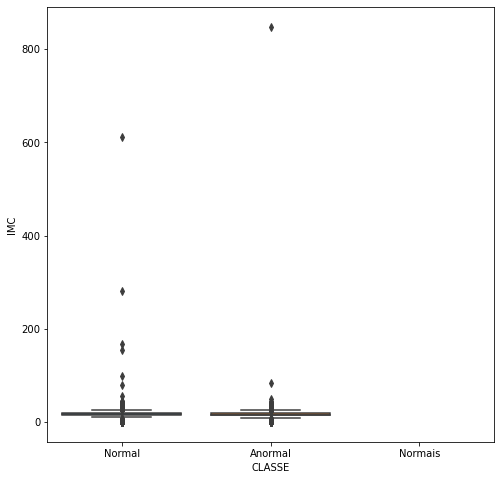

In [3856]:
plotar_boxplot(train_data, "IMC", "CLASSE")

<small>A plotagem dos valores de IMC indicam a grande quantidade de outliners e valores inválidos, afinal, no gráfico constam valores impossíveis para o IMC, mesmo que não sejam considerados outliners. A abordagem será feita pela calculação do IMC utilizando a altura e peso das amostras</small>

Plotar boxplot das idades em relação as classes

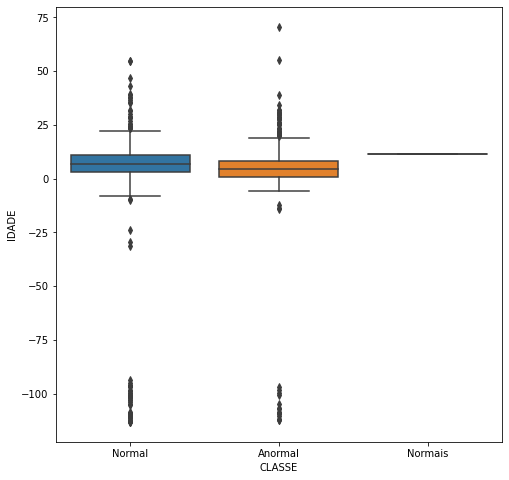

In [3857]:
plotar_boxplot(train_data, "IDADE", "CLASSE")

<small>O gráfico nos mostra uma grande quantidade de outliners e valores inválidos, como menor que 0, a serem tratados, sendo necessário fazer uma grande limpeza</small>

Plotar boxplot da PA Sistolica (pressão arterial sistólica) em relação as classes

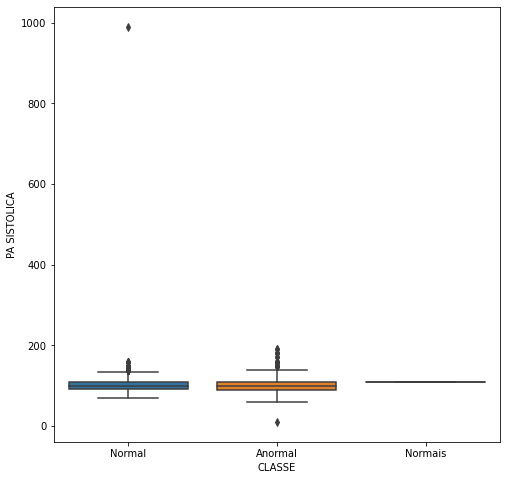

In [3858]:
plotar_boxplot(train_data, "PA SISTOLICA", "CLASSE")

<small>Pelo gráfico, é possível identificar um pequeno número outliners a serem tratados</small>

Plotar boxplot da PA Diastolica (pressão arterial diastolica) em relação as classes

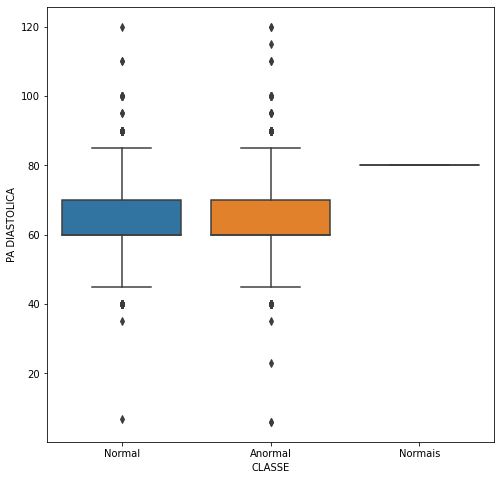

In [3859]:
plotar_boxplot(train_data, "PA DIASTOLICA", "CLASSE")

<small>Assim como na PA sistolica, é possível identificar um pequeno número de outilners a serem removidos</small>

Plotar boxplot da Frequência cardíaca (FC) em relação as classes

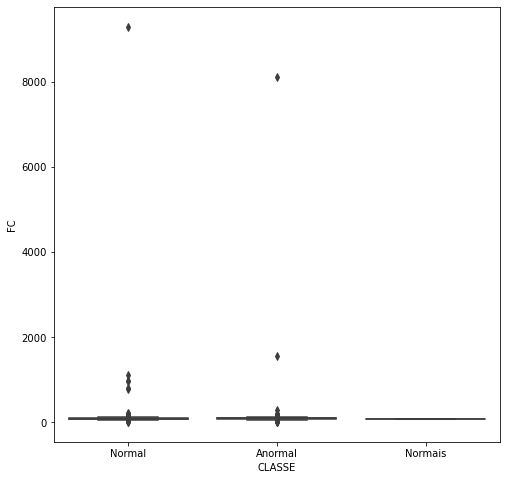

In [3860]:
plotar_boxplot(train_data, "FC", "CLASSE")

<small>O gráfico mostra que outliners, mesmo que em pouco número, estão presentes e precisam ser tratados</small>

#### Após a plotagem,  vamos analisar as medidas descritivas de cada coluna.

In [3861]:
display(train_data.iloc[:, 1:].describe(include=[np.number]))

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,14467.000000,14727.000000,10710.000000,13231.000000,8232.000000,8222.000000,12817.000000
mean,20.979374,82.971209,17.792437,5.970463,101.395773,62.372780,94.084419
std,18.189793,57.028885,11.214492,8.417493,14.995826,8.951357,111.021244
min,-40.000000,0.000000,0.000000,-113.180000,10.000000,6.000000,10.000000
25%,6.000000,0.000000,15.000000,2.150000,90.000000,60.000000,80.000000
50%,17.500000,98.000000,17.000000,5.680000,100.000000,60.000000,90.000000
75%,31.000000,130.000000,19.000000,10.010000,110.000000,70.000000,100.000000
max,127.000000,198.000000,848.000000,71.810000,990.000000,120.000000,9288.000000


Pelas medidas descritivas, é possível perceber uma grande variância nas amostras, possivelmente causada pela presença de outliners. Isso pode ser afirmado pela alta diferença entre  máximo e o mínimo de cada atributo, no pré-processamento, o objetivo será a remoção desses outliners afim de diminuir o desvio padrão.

#### Por último, será feito o levantamento de quais atributos possuem valores NaN, que precisarão ser tratados junto com os outliners

In [3862]:
display(train_data.isna().sum())

Id                   0
Peso               260
Altura               0
IMC               4017
Atendimento        983
DN                1376
IDADE             1496
Convenio          4493
PULSOS            1192
PA SISTOLICA      6495
PA DIASTOLICA     6505
PPA                197
B2                1177
SOPRO             1165
FC                1910
HDA 1             4614
HDA2             14188
SEXO                 3
MOTIVO1           1073
MOTIVO2           4059
CLASSE            1168
dtype: int64

Os pontos principais desse print são: apenas o atributo altura não possui valores NaN e a coluna que representa a classe possui 1168 valores NaN, que precisarão ser removidos, pois não há como preenche-los.

---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Para iniciar essa etapa, iremos remover colunas que não serão úteis durante o processo de treinamento, são elas: Atendimento, DN e Convenio.

In [3863]:
train_data = train_data.drop(columns=["Atendimento", "DN", "Convenio"])

#### Agora iremos começar a tratar as colunas númericas pela remoção de outliners, porém antes disso, iremos remover alguns valores inválidos manualmente, como peso menor que 0, que pode atrapalhar o processo de remoção dos outliners

Removendo peso menor que 0

In [3864]:
peso_invalido = train_data[train_data["Peso"] < 0]

train_data = train_data.drop(peso_invalido.index)

Removendo alturas menores que 50 (altura média de um recém nascido)

In [3865]:
altura_invalida = train_data[train_data["Altura"] < 50]

train_data = train_data.drop(altura_invalida.index)

Removendo idade menor que 0 e idade maior que 19

In [3866]:
idade_invalida = train_data[(train_data["IDADE"] <= 0) | (train_data["IDADE"] > 19)]

train_data = train_data.drop(idade_invalida.index)

Removendo valor de PA Sistolica irreal

In [3867]:
pa_sistolica_invalida = train_data[
    (train_data["PA SISTOLICA"] > 500) | (train_data["PA SISTOLICA"] < 40)
]

train_data = train_data.drop(pa_sistolica_invalida.index)

Removendo valores de PA Diastolica irreais

In [3868]:
pa_diastolica_irreal = train_data[train_data["PA DIASTOLICA"] < 30]

train_data = train_data.drop(pa_diastolica_irreal.index)

Removendo valores de frequência cardíaca irreais

In [3869]:
fc_irreal = train_data[(train_data["FC"] > 250) | (train_data["FC"] < 30)]

train_data = train_data.drop(fc_irreal.index)

##### Logo depois, iremos tratar os outliners das colunas numéricas, pois eles influenciam diretamente na média e mediana, que poderão ser usadas para preencher os NaN. As colunas que não serão tratadas são: PA Sistolica, PA Diastolica e FC pois os valores outliners tem grande chances de estarem diretamente relacionados com problemas cardíacos. Além disso, IMC não será tratado pois ele será recalculado com peso e altura.

In [3870]:
colunas_numericas = ["Peso", 'Altura', 'IDADE']

# Primeiro usa a função para retornar todas as amostras que são outliners
outliners = identifica_outliners(train_data, colunas_numericas)

In [3871]:
train_data = train_data.drop(outliners[outliners].index)

##### Após a remoção dos outliners, iremos novamente plotar os boxplots para valores numéricos, para analisar as mudanças

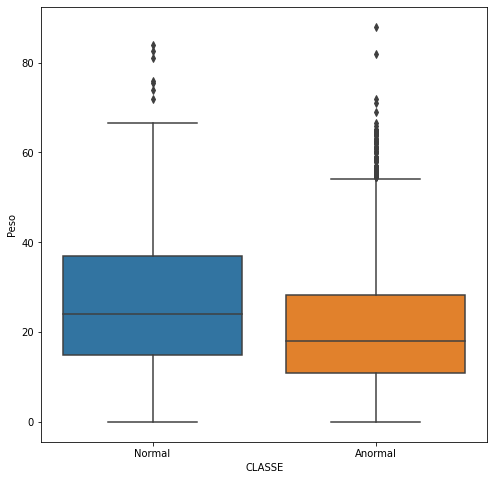

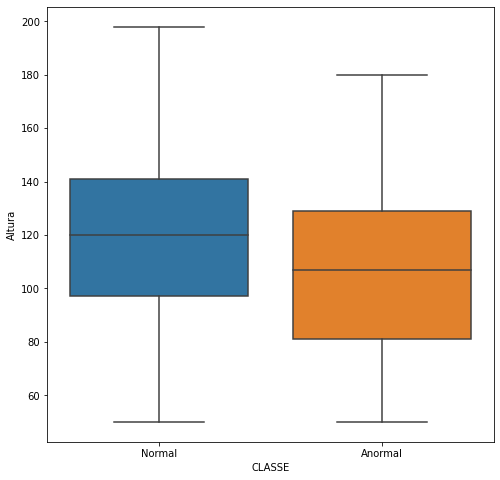

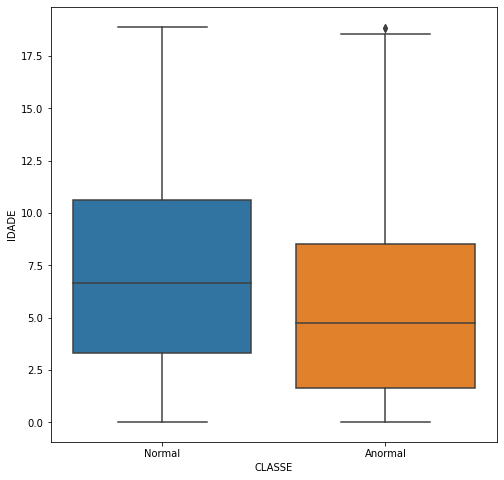

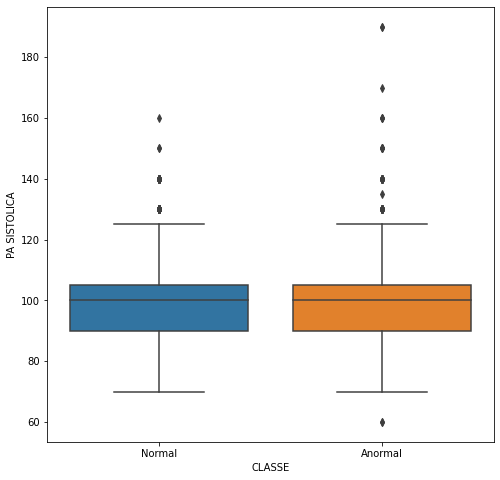

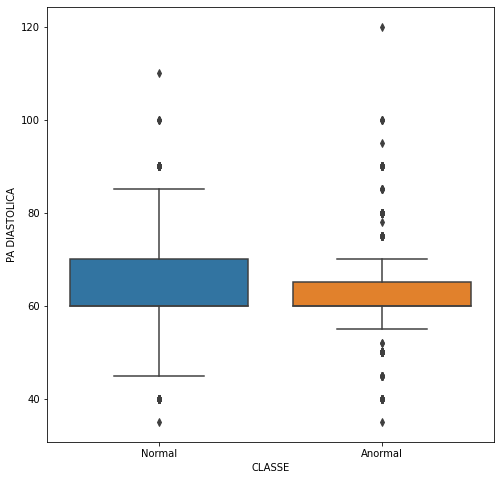

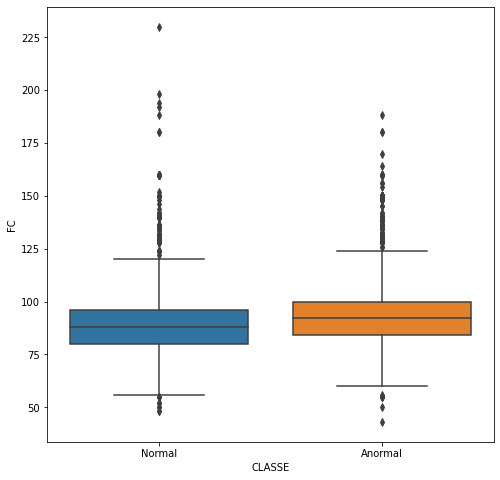

In [3872]:
colunas_numericas = ["Peso", "Altura", "IDADE", "PA SISTOLICA", "PA DIASTOLICA", "FC"]


for coluna in colunas_numericas:
    plotar_boxplot(train_data, coluna, "CLASSE")

In [3873]:
display(train_data.iloc[:, 1:].describe(include=[np.number]))

,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,9874.000000,10077.000000,9874.000000,9703.000000,6290.000000,6287.000000,9313.000000
mean,24.647407,112.880917,17.464655,6.420056,100.451033,61.860347,91.312789
std,14.872482,31.007403,3.935983,4.480835,10.354930,8.349274,15.691937
min,0.000000,50.000000,0.000000,0.010000,60.000000,35.000000,43.000000
25%,13.900000,92.000000,15.000000,2.700000,90.000000,60.000000,80.000000
50%,21.500000,115.000000,17.000000,5.890000,100.000000,60.000000,90.000000
75%,34.000000,137.000000,19.000000,9.910000,105.000000,65.000000,100.000000
max,88.000000,198.000000,167.000000,18.910000,190.000000,120.000000,230.000000


##### Após a plotagem dos gráficos e dos valores referentes aos dados, fica claro que a limpeza de dados irreais e a remoção de parte dos outliers diminuiu a variação dos valores, pois todos os stds diminuiram e nos gráficos, o número de outliners diminuiu drasticamente.

##### Agora com os outliners tratados, iremos substituir os valores NaN nas colunas numéricas.

In [3874]:
print(train_data[colunas_numericas].isna().sum())

Peso              203
Altura              0
IDADE             374
PA SISTOLICA     3787
PA DIASTOLICA    3790
FC                764
dtype: int64


Em todas as colunas numéricas, com exceção do IMC que será recalculado, os valores NaN serão substituidos pela mediana, visto que o desvio padrão é relativamente alto para as amostras.

In [3875]:
train_data["PA DIASTOLICA"] = fill_na_mediana(train_data, "PA DIASTOLICA")
train_data["PA SISTOLICA"] = fill_na_mediana(train_data, "PA SISTOLICA")
train_data["FC"] = fill_na_mediana(train_data, "FC")

In [3876]:
train_data["Peso"] = fill_na_mediana(train_data, "Peso")
train_data["Altura"] = fill_na_mediana(train_data, "Altura")
train_data["IDADE"] = fill_na_mediana(train_data, "IDADE")

In [3877]:
print(train_data[colunas_numericas].isna().sum())

Peso             0
Altura           0
IDADE            0
PA SISTOLICA     0
PA DIASTOLICA    0
FC               0
dtype: int64


Com isso, os valores NaN nas colunas numéricas foram resolvidos, agora basta recalcular o IMC utilizando o peso e a altura

In [3878]:
altura_aux = train_data["Altura"] / 100


train_data["IMC"] = train_data["Peso"] / np.power(altura_aux, 2)

In [3879]:
display(train_data.describe())

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000,10077.000000
mean,8837.248983,24.584003,112.880917,17.646072,6.400383,100.281532,61.160663,91.213258
std,5128.102689,14.728543,31.007403,5.053254,4.398030,8.183681,6.655944,15.089302
min,2.000000,0.000000,50.000000,0.000000,0.010000,60.000000,35.000000,43.000000
25%,4408.000000,14.000000,92.000000,15.378700,2.850000,100.000000,60.000000,80.000000
50%,8811.000000,21.500000,115.000000,16.949153,5.890000,100.000000,60.000000,90.000000
75%,13152.000000,33.300000,137.000000,19.229649,9.760000,100.000000,60.000000,100.000000
max,17869.000000,88.000000,198.000000,167.319331,18.910000,190.000000,120.000000,230.000000


In [3880]:
display(train_data)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,NaN,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100.0,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
4,11652,42.4,136,22.923875,0.06,Normais,100.0,60.0,Não Calculado,Normal,ausente,78.0,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
5,15430,45.0,161,17.360441,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
6,1023,18.5,105,16.780045,3.93,Normais,90.0,60.0,Normal,Normal,ausente,92.0,NaN,NaN,F,7 - Outro,Outro,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14719,9673,16.7,100,16.700000,3.49,Normais,90.0,60.0,Normal,Normal,ausente,120.0,NaN,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial,Normal
14721,3023,25.0,126,15.747040,8.80,Normais,100.0,60.0,Normal,Normal,ausente,76.0,Assintomático,NaN,F,5 - Parecer cardiológico,NaN,Normal
14723,3249,30.0,113,23.494401,4.97,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,sistólico,92.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal
14724,3207,25.8,130,15.266272,7.69,Normais,90.0,55.0,Normal,Normal,ausente,78.0,Assintomático,NaN,M,6 - Suspeita de cardiopatia,6 - Sopro,Normal


#### Agora com todas as colunas numéricas tratadas, partiremos para as colunas não numéricas

Substituindo 'Normais' por 'Normal' no atributo CLASSE.

In [3881]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [3882]:
print(train_data["CLASSE"].unique())

['Normal' 'Anormal' nan]


Substituindo 'NORMAIS' por 'Normais' e 'AMPLOS' por 'Amplos' no atributo PULSOS

In [3883]:
substituir(train_data, "PULSOS", "NORMAIS", "Normais")
substituir(train_data, "PULSOS", "AMPLOS", "Amplos")

In [3884]:
print(train_data["PULSOS"].unique())

['Normais' 'Femorais diminuidos' nan 'Outro' 'Amplos' 'Diminuídos ']


Substituindo 'sistólico' por 'Sistólico' e 'contínuo' por 'Contínuo'

In [3885]:
substituir(train_data, "SOPRO", "sistólico", "Sistólico")
substituir(train_data, "SOPRO", "contínuo", "Contínuo")

In [3886]:
print(train_data["SOPRO"].unique())

['ausente' 'Sistólico' nan 'Contínuo' 'diastólico'
 'Sistolico e diastólico']


Substituindo 'Masculino' e 'masculino' por 'M' e 'Feminino' por 'F'

In [3887]:
substituir(train_data, "SEXO", "Masculino", "M")
substituir(train_data, "SEXO", "masculino", "M")

substituir(train_data, "SEXO", "Feminino", "F")

In [3888]:
print(train_data["SEXO"].unique())

['M' 'F' 'Indeterminado' nan]


In [3889]:
print(train_data.isna().sum())

Id                  0
Peso                0
Altura              0
IMC                 0
IDADE               0
PULSOS            310
PA SISTOLICA        0
PA DIASTOLICA       0
PPA               100
B2                302
SOPRO             297
FC                  0
HDA 1            2563
HDA2             9694
SEXO                2
MOTIVO1           102
MOTIVO2          2222
CLASSE            307
dtype: int64


#### Agora com a remoção de valores redundantes, será tratados os valores NaN das colunas não numéricas

Removendo NaN de PULSOS

In [3890]:
train_data = train_data.dropna(subset=["PULSOS"])

In [3891]:
print(train_data["PULSOS"].isna().sum())

0


Removendo NaN de B2

In [3892]:
train_data = train_data.dropna(subset=["B2"])

In [3893]:
print(train_data["B2"].isna().sum())

0


Sopro já não contém mais NaN

In [3894]:
print(train_data["SOPRO"].isna().sum())

0


Como HDA 1 e HDA2 tem muitas amostrar com NaN, é mais interessane mantê-las ao invés de remove-las, por isso, substituiremos por 'Assintomáticos'. Visto que não há sintomas (NaN), assintomáticos é uma substituição válida.

In [3895]:
train_data = train_data.dropna(subset=['HDA 1'])

In [3896]:
train_data["HDA2"] = train_data["HDA2"].fillna("Assintomático")

Iremos plotar os gráficos de HDA1 e HDA 2 novamente para ver as mudanças

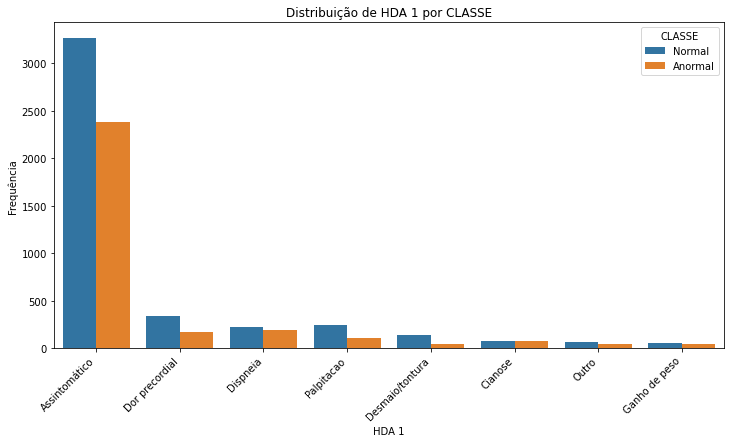

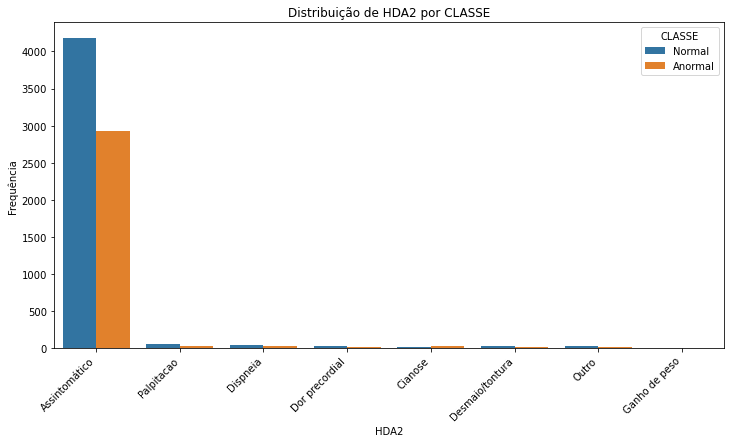

In [3897]:
plotar_grafico_barras(train_data, "HDA 1", "CLASSE")
plotar_grafico_barras(train_data, "HDA2", "CLASSE")

Removendo NaN de SEXO

In [3898]:
train_data = train_data.dropna(subset=["SEXO"])

In [3899]:
print(train_data["SEXO"].isna().sum())

0


Removendo NaN de MOTIVO1

In [3900]:
train_data = train_data.dropna(subset=["MOTIVO1"])

In [3901]:
print(train_data["MOTIVO1"].isna().sum())

0


Removendo NaN de MOTIVO2 (ponto de atenção, pois são muitas amostras)

In [3902]:
train_data = train_data.dropna(subset=["MOTIVO2"])

In [3903]:
print(train_data["MOTIVO2"].isna().sum())

0


Removendo NaN e #VALUE! de PPA, os trocando por não calculado

In [3904]:
print(train_data['PPA'].unique())

['HAS-1 PAD' 'Não Calculado' 'HAS-1 PAS' 'Normal' 'Pre-Hipertensão PAS'
 'HAS-2 PAS' nan 'Pre-Hipertensão PAD' '#VALUE!' 'HAS-2 PAD']


In [3905]:
train_data["PPA"] = train_data["PPA"].replace('#VALUE!', np.nan)

In [3906]:
train_data = train_data.dropna(subset=["PPA"])

In [3907]:
print(train_data["PPA"].isna().sum())

0


In [3908]:
display(train_data)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,Assintomático,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
5,15430,45.0,161,17.360441,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
8,14309,24.0,112,19.132653,5.27,Normais,100.0,60.0,Normal,Normal,ausente,100.0,Outro,Assintomático,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.000000,3.44,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,12739,40.0,130,23.668639,8.03,Normais,90.0,60.0,Normal,Normal,Sistólico,92.0,Dor precordial,Assintomático,M,6 - Suspeita de cardiopatia,6 - Dor precordial,Anormal
14716,390,25.0,110,20.661157,5.15,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia,Normal
14717,14869,10.0,70,20.408163,0.60,Normais,100.0,60.0,Não Calculado,Normal,ausente,112.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,Outro,Normal
14723,3249,30.0,113,23.494401,4.97,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,Sistólico,92.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal


Removendo NaN de CLASSE

In [3909]:
train_data = train_data.dropna(subset=["CLASSE"])

In [3910]:
print(train_data.isna().sum())
display(train_data)

Id               0
Peso             0
Altura           0
IMC              0
IDADE            0
PULSOS           0
PA SISTOLICA     0
PA DIASTOLICA    0
PPA              0
B2               0
SOPRO            0
FC               0
HDA 1            0
HDA2             0
SEXO             0
MOTIVO1          0
MOTIVO2          0
CLASSE           0
dtype: int64


,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,Assintomático,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
5,15430,45.0,161,17.360441,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
8,14309,24.0,112,19.132653,5.27,Normais,100.0,60.0,Normal,Normal,ausente,100.0,Outro,Assintomático,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.000000,3.44,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,12739,40.0,130,23.668639,8.03,Normais,90.0,60.0,Normal,Normal,Sistólico,92.0,Dor precordial,Assintomático,M,6 - Suspeita de cardiopatia,6 - Dor precordial,Anormal
14716,390,25.0,110,20.661157,5.15,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia,Normal
14717,14869,10.0,70,20.408163,0.60,Normais,100.0,60.0,Não Calculado,Normal,ausente,112.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,Outro,Normal
14723,3249,30.0,113,23.494401,4.97,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,Sistólico,92.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal


#### Com os dados de treino já tratados, agora iremos lidar com os dados de teste

Carregando os dados teste

In [3911]:

test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")

test_data = data2.merge(test_data, on="Id", how="right")

display(test_data)

,Id,Peso,Altura,IMC,Atendimento,DN,IDADE,Convenio,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.0,03/08/09,11/06/09,0.15,NaN,Normais,NaN,NaN,Não Calculado,Normal,ausente,110,Dispneia,Outro,F,2 - Check-up,NaN
1,4246,42.4,150,19.0,23/02/06,03/03/94,12.43,MEDISE,Normais,NaN,NaN,Não Calculado,Normal,ausente,84,Assintomático,NaN,M,5 - Parecer cardiológico,5 - Atividade física
2,9089,18.1,104,17.0,16/10/07,08/02/04,3.82,CAMED,Normais,130.0,90.0,HAS-2 PAS,Normal,ausente,100,Cianose,NaN,M,5 - Parecer cardiológico,NaN
3,10606,7.7,0,NaN,09/08/04,27/11/03,0.73,SULA,Normais,NaN,NaN,Não Calculado,Normal,ausente,98,Assintomático,NaN,F,1 - Cardiopatia já estabelecida,1 - Cardiopatia congenica
4,9863,16.0,0,NaN,04/07/08,29/08/04,3.99,NORCLIN.,Normais,NaN,NaN,Não Calculado,Normal,ausente,90,Assintomático,NaN,F,5 - Parecer cardiológico,5 - Cirurgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,14053,0.0,0,NaN,16/09/09,19/04/02,7.69,FUSEX,Normais,100.0,70.0,Não Calculado,Normal,ausente,72,NaN,NaN,M,2 - Check-up,NaN
3142,9000,0.0,0,NaN,12/01/05,06/11/95,9.529999999999999,GS,Normais,90.0,50.0,Não Calculado,Normal,Sistólico,82,Dor precordial,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial
3143,14643,46.0,151,20.0,18/02/04,20/10/90,13.83,UR,Normais,120.0,60.0,Normal,Normal,Sistólico,96,Dispneia,NaN,F,6 - Suspeita de cardiopatia,6 - Dor precordial
3144,15107,NaN,50,NaN,05/09/06,04/09/06,0,GS,Normais,NaN,NaN,Não Calculado,Normal,Sistólico,133,NaN,NaN,Indeterminado,6 - Suspeita de cardiopatia,6 - Sopro


Convertendo as colunas FC e IDADE para numericos

In [3912]:
converter_numeric(test_data, "FC")
converter_numeric(test_data, "IDADE")

Printando as medidas descritivas para análise

In [3913]:
display(test_data.describe())

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC
count,3146.000000,3088.000000,3146.000000,2436.000000,3146.000000,1911.000000,1911.000000,2999.000000
mean,8893.254291,22.026231,88.050223,17.867406,6.186538,100.962323,62.006279,92.593198
std,5122.239610,17.422042,54.264037,15.284035,4.573168,17.553885,8.592640,22.563362
min,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000,35.000000,8.000000
25%,4507.750000,9.000000,51.000000,15.000000,2.340000,90.000000,60.000000,80.000000
50%,9002.500000,18.500000,102.000000,17.000000,5.480000,100.000000,60.000000,90.000000
75%,13236.750000,32.000000,130.000000,19.000000,9.847500,105.000000,68.000000,100.000000
max,17870.000000,157.000000,197.000000,742.000000,17.990000,700.000000,110.000000,900.000000


Substituindo valores NaN em PA DIASTOLICA, PA SISTOLICA e FC pela mediana, devido à grande ao alto desvio padrão

Substituindo os valores NaN por suas mediana, devido ao alto desvio padrão quando se comparado com suas amplitudes

In [3914]:
test_data["PA DIASTOLICA"] = fill_na_mediana(test_data, "PA DIASTOLICA")
test_data["PA SISTOLICA"] = fill_na_mediana(test_data, "PA SISTOLICA")
test_data["FC"] = fill_na_mediana(test_data, "FC")

In [3915]:
test_data["Peso"] = fill_na_mediana(test_data, "Peso")
test_data["Altura"] = fill_na_mediana(test_data, "Altura")
test_data["IDADE"] = fill_na_mediana(test_data, "IDADE")

Plotando os gráficos de peso e altura para analisar os valores

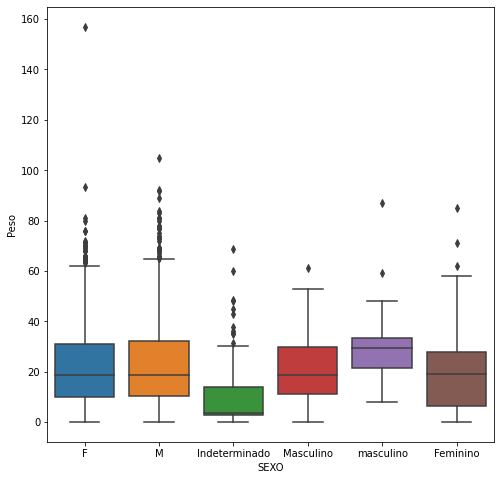

In [3916]:
plotar_boxplot(test_data, "Peso", "SEXO")

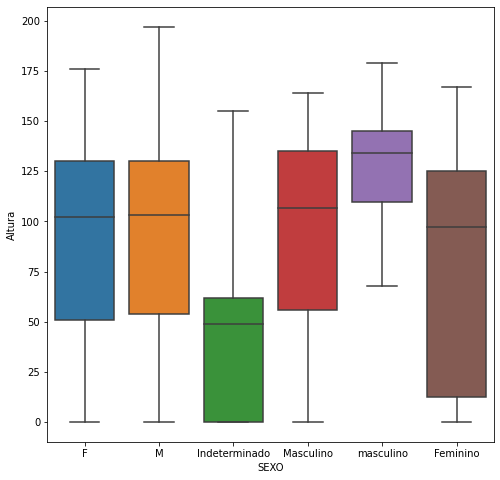

In [3917]:
plotar_boxplot(test_data, 'Altura', 'SEXO')

Plotando os boxplots de Peso e altura, notou-se a necessidade de lidar com valores irregulares, como pesos com valor zero e alturas com valor menor que 50

In [3918]:
test_data["Peso"] = test_data["Peso"].replace(0, test_data["Peso"].median())

O mesmo ocorre com a altura

In [3919]:
test_data["Altura"] = test_data["Altura"].replace(0, test_data["Altura"].median())

In [3920]:
altura_invalida = test_data[test_data["Altura"] < 50]

test_data.loc[altura_invalida.index, "Altura"] = test_data["Altura"].median()

Com peso e altura resolvidos, podemos recalcular o IMC das amostras

In [3921]:
altura_aux = test_data["Altura"] / 100


test_data["IMC"] = test_data["Peso"] / np.power(altura_aux, 2)

#### Agora iremos tratar as colunas não numéricas

Removendo atributos que não seão úteis

In [3922]:
test_data = test_data.drop(columns=["Atendimento", "DN", "Convenio"])

Substituindo 'NORMAIS' por 'Normais' e 'AMPLOS' por 'Amplos' no atributo PULSOS

In [3923]:
substituir(test_data, "PULSOS", "NORMAIS", "Normais")
substituir(test_data, "PULSOS", "AMPLOS", "Amplos")

In [3924]:
substituir(test_data, "SOPRO", "sistólico", "Sistólico")
substituir(test_data, "SOPRO", "contínuo", "Contínuo")

Substituindo 'Masculino' e 'masculino' por 'M' e 'Feminino' por 'F'

In [3925]:
substituir(test_data, "SEXO", "Masculino", "M")
substituir(test_data, "SEXO", "masculino", "M")

substituir(test_data, "SEXO", "Feminino", "F")

#### Como não é possível remover os atributos NaN no conjunto de testes, iremos substituir os valores NaN pela moda de cada respectivo atributo não numérico

In [3926]:
test_data["PULSOS"] = test_data["PULSOS"].fillna(test_data["PULSOS"].mode()[0])

In [3927]:
test_data["B2"] = test_data["B2"].fillna(test_data["B2"].mode()[0])

In [3928]:
test_data["SOPRO"] = test_data["SOPRO"].fillna(test_data["SOPRO"].mode()[0])

In [3929]:
test_data["SEXO"] = test_data["SEXO"].fillna(test_data["SEXO"].mode()[0])

In [3930]:
test_data["MOTIVO1"] = test_data["MOTIVO1"].fillna(test_data["MOTIVO1"].mode()[0])
test_data["MOTIVO2"] = test_data["MOTIVO2"].fillna(test_data["MOTIVO2"].mode()[0])

In [3931]:
test_data["PPA"] = test_data["PPA"].replace("#VALUE!", np.nan)
test_data["PPA"] = test_data["PPA"].fillna(test_data['PPA'].mode()[0])

In [3932]:
test_data["HDA 1"] = test_data["HDA 1"].fillna("Assintomático")
test_data["HDA2"] = test_data["HDA2"].fillna("Assintomático")

In [3933]:
display(test_data.isna().sum())

Id               0
Peso             0
Altura           0
IMC              0
IDADE            0
PULSOS           0
PA SISTOLICA     0
PA DIASTOLICA    0
PPA              0
B2               0
SOPRO            0
FC               0
HDA 1            0
HDA2             0
SEXO             0
MOTIVO1          0
MOTIVO2          0
dtype: int64

Agora, com ambos os conjuntos de dados tratados, treino e teste, iremos substituir os valores não numéricos de ambos por valores numéricos, afim de poder usa-los no modelo de classificação.

In [3934]:
display(train_data)

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,Assintomático,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
5,15430,45.0,161,17.360441,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
8,14309,24.0,112,19.132653,5.27,Normais,100.0,60.0,Normal,Normal,ausente,100.0,Outro,Assintomático,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.000000,3.44,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,12739,40.0,130,23.668639,8.03,Normais,90.0,60.0,Normal,Normal,Sistólico,92.0,Dor precordial,Assintomático,M,6 - Suspeita de cardiopatia,6 - Dor precordial,Anormal
14716,390,25.0,110,20.661157,5.15,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,F,5 - Parecer cardiológico,5 - Cirurgia,Normal
14717,14869,10.0,70,20.408163,0.60,Normais,100.0,60.0,Não Calculado,Normal,ausente,112.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,Outro,Normal
14723,3249,30.0,113,23.494401,4.97,Normais,105.0,70.0,Pre-Hipertensão PAD,Normal,Sistólico,92.0,Dispneia,Palpitacao,F,6 - Suspeita de cardiopatia,6 - Dispnéia,Anormal


In [3935]:
display(train_data.head())

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,Normais,110.0,80.0,HAS-1 PAD,Normal,ausente,100.0,Palpitacao,Assintomático,M,6 - Suspeita de cardiopatia,6 - Palpitação/taquicardia/arritmia,Normal
2,4483,13.0,87,17.175320,2.21,Normais,100.0,60.0,Não Calculado,Normal,Sistólico,100.0,Assintomático,Assintomático,M,6 - Suspeita de cardiopatia,6 - Sopro,Anormal
5,15430,45.0,161,17.360441,7.60,Normais,120.0,70.0,HAS-1 PAS,Normal,ausente,80.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal
8,14309,24.0,112,19.132653,5.27,Normais,100.0,60.0,Normal,Normal,ausente,100.0,Outro,Assintomático,M,6 - Suspeita de cardiopatia,6 - HAS/dislipidemia/obesidade,Normal
9,3437,17.0,100,17.000000,3.44,Normais,100.0,60.0,Não Calculado,Normal,ausente,92.0,Assintomático,Assintomático,M,5 - Parecer cardiológico,5 - Cirurgia,Normal


Com a a classe já tratada, agora iremos mapear os demais atributos das duas colunas

Usaremos o LabelEncoder, responsável por mapear cada valor único de uma coluna não numérica em um valor númerico distinto,

In [3936]:
from sklearn.preprocessing import LabelEncoder

In [3937]:
lencoder = LabelEncoder()

In [3938]:

pulsos_num = lencoder.fit_transform(train_data["PULSOS"])
ppa_num = lencoder.fit_transform(train_data["PPA"])
b2_num = lencoder.fit_transform(train_data["B2"])
sopro_num = lencoder.fit_transform(train_data["SOPRO"])
hda1_num = lencoder.fit_transform(train_data["HDA 1"])
hda2_num = lencoder.fit_transform(train_data["HDA2"])
sexo_num = lencoder.fit_transform(train_data["SEXO"])
motivo1_num = lencoder.fit_transform(train_data["MOTIVO1"])
motivo2_num = lencoder.fit_transform(train_data["MOTIVO2"])
class_num = lencoder.fit_transform(train_data['CLASSE'])

In [3939]:
train_data["PULSOS"] = pulsos_num
train_data["PPA"] = ppa_num
train_data["B2"] = b2_num
train_data["SOPRO"] = sopro_num
train_data["HDA 1"] = hda1_num
train_data["HDA2"] = hda2_num
train_data["SEXO"] = sexo_num
train_data["MOTIVO1"] = motivo1_num
train_data["MOTIVO2"] = motivo2_num
train_data['CLASSE'] = class_num

Depois para o conjunto de testes

In [3940]:
pulsos_num = lencoder.fit_transform(test_data["PULSOS"])
ppa_num = lencoder.fit_transform(test_data["PPA"])
b2_num = lencoder.fit_transform(test_data["B2"])
sopro_num = lencoder.fit_transform(test_data["SOPRO"])
hda1_num = lencoder.fit_transform(test_data["HDA 1"])
hda2_num = lencoder.fit_transform(test_data["HDA2"])
sexo_num = lencoder.fit_transform(test_data["SEXO"])
motivo1_num = lencoder.fit_transform(test_data["MOTIVO1"])
motivo2_num = lencoder.fit_transform(test_data["MOTIVO2"])

In [3941]:
test_data["PULSOS"] = pulsos_num
test_data["PPA"] = ppa_num
test_data["B2"] = b2_num
test_data["SOPRO"] = sopro_num
test_data["HDA 1"] = hda1_num
test_data["HDA2"] = hda2_num
test_data["SEXO"] = sexo_num
test_data["MOTIVO1"] = motivo1_num
test_data["MOTIVO2"] = motivo2_num

In [3942]:
display(train_data.head(5))

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2,CLASSE
0,10524,28.0,123,18.507502,5.79,2,110.0,80.0,0,2,2,100.0,7,0,2,3,12,1
2,4483,13.0,87,17.175320,2.21,2,100.0,60.0,5,2,1,100.0,0,0,2,3,13,0
5,15430,45.0,161,17.360441,7.60,2,120.0,70.0,1,2,2,80.0,0,0,2,2,3,1
8,14309,24.0,112,19.132653,5.27,2,100.0,60.0,4,2,2,100.0,6,0,2,3,11,1
9,3437,17.0,100,17.000000,3.44,2,100.0,60.0,5,2,2,92.0,0,0,2,2,3,1


<small>O lencoder mapeou Normal como 1 e Anormal como 0 por conta da ordem alfabética, logo, ao invés de escrever a segunda coluna como o resultado do .csv da previsão, será necessário escrever a primeira coluna</small>

In [3943]:
display(test_data.head(5))

,Id,Peso,Altura,IMC,IDADE,PULSOS,PA SISTOLICA,PA DIASTOLICA,PPA,B2,SOPRO,FC,HDA 1,HDA2,SEXO,MOTIVO1,MOTIVO2
0,8957,4.5,54,15.432099,0.15,3,100.0,60.0,5,2,2,110.0,3,6,0,1,3
1,4246,42.4,150,18.844444,12.43,3,100.0,60.0,5,2,2,84.0,0,0,2,2,2
2,9089,18.1,104,16.734467,3.82,3,130.0,90.0,3,2,2,100.0,1,0,2,2,3
3,10606,7.7,102,7.401000,0.73,3,100.0,60.0,5,2,2,98.0,0,0,0,0,1
4,9863,16.0,102,15.378700,3.99,3,100.0,60.0,5,2,2,90.0,0,0,0,2,3


Normalização dos dados

In [3944]:
from sklearn.preprocessing import StandardScaler

In [3945]:
dados = pd.concat([train_data, test_data], axis=0)

ids = dados['Id'].to_numpy()
classes = dados['CLASSE'].to_numpy()

In [3946]:
dados = dados.drop(columns=['Id', 'CLASSE'])

In [3947]:
scaler = StandardScaler()
dados_normalizados = pd.DataFrame(scaler.fit_transform(dados), columns=dados.columns)

Com os dados já processados, iremos fazer a redução do número de features, através do  PCA

In [3948]:
from sklearn.decomposition import PCA

In [3949]:
pca_auto = PCA(n_components=0.90)  
dados_pca = pd.DataFrame(pca_auto.fit_transform(dados_normalizados))

In [3950]:
n_components_train = dados_pca.shape[1]   
dados_pca.columns = [f"PC{i+1}" for i in range(n_components_train)]

In [3951]:
dados_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,2.802184,2.592475,0.673837,0.848898,-1.509818,-2.324531,0.903992,-1.406510,-1.007761,-4.589771,2.036665
1,-1.758720,1.460530,0.344513,-1.119774,-0.124332,-0.674225,-0.368909,0.329324,0.501629,0.391026,-0.161503
2,3.629887,-0.594950,0.518579,-0.950662,-1.645365,-1.772656,0.682632,-0.902913,-0.755089,-2.760352,-0.463544
3,0.354028,1.797365,-0.496302,1.056204,0.473604,-1.274032,-0.303344,0.124494,-0.706383,-0.628828,2.076320
4,-0.786378,-0.960460,0.144679,-0.113723,0.335741,-1.106838,-0.176449,0.341348,-0.695752,0.438927,-0.151398
...,...,...,...,...,...,...,...,...,...,...,...
8385,0.529097,-1.820919,0.912814,0.056770,0.765307,-0.127002,-0.505347,-1.006823,-0.069701,0.437068,-0.410219
8386,-0.464156,1.253865,-1.728358,0.598748,0.525995,1.982478,-0.220665,-0.138790,1.205917,0.538197,1.106544
8387,2.693867,1.614303,0.561152,0.024279,-0.265356,1.780852,0.312222,-0.626158,1.064194,0.052001,0.939479
8388,-0.959059,1.732598,3.994024,-0.375858,4.412863,2.250596,-2.270623,6.238521,2.406728,-3.691634,-0.193599


##### Após reduzir o número de features através do PCA,agora iremos criar um novo atributo, com base no clustres em que ele ficaria agrupado após a aplicação do K-means

In [3952]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(dados_pca)

KMeans(n_clusters=3, random_state=42)

In [3954]:
rotulos = kmeans.labels_
centroides = kmeans.cluster_centers_


In [3955]:
dados_pca['CLUSTER'] = rotulos

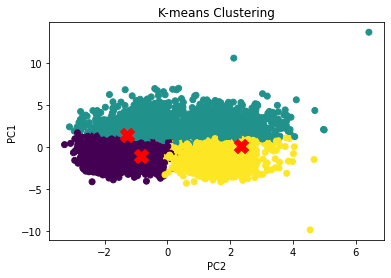

In [3956]:
plt.scatter(dados_pca['PC2'], dados_pca['PC1'], c=dados_pca['CLUSTER'], cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], s=200, c='red', marker='X')  # Centróides em vermelho
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.title('K-means Clustering')
plt.show()

In [3957]:
dados_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,CLUSTER
0,2.802184,2.592475,0.673837,0.848898,-1.509818,-2.324531,0.903992,-1.406510,-1.007761,-4.589771,2.036665,1
1,-1.758720,1.460530,0.344513,-1.119774,-0.124332,-0.674225,-0.368909,0.329324,0.501629,0.391026,-0.161503,2
2,3.629887,-0.594950,0.518579,-0.950662,-1.645365,-1.772656,0.682632,-0.902913,-0.755089,-2.760352,-0.463544,1
3,0.354028,1.797365,-0.496302,1.056204,0.473604,-1.274032,-0.303344,0.124494,-0.706383,-0.628828,2.076320,2
4,-0.786378,-0.960460,0.144679,-0.113723,0.335741,-1.106838,-0.176449,0.341348,-0.695752,0.438927,-0.151398,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8385,0.529097,-1.820919,0.912814,0.056770,0.765307,-0.127002,-0.505347,-1.006823,-0.069701,0.437068,-0.410219,0
8386,-0.464156,1.253865,-1.728358,0.598748,0.525995,1.982478,-0.220665,-0.138790,1.205917,0.538197,1.106544,2
8387,2.693867,1.614303,0.561152,0.024279,-0.265356,1.780852,0.312222,-0.626158,1.064194,0.052001,0.939479,1
8388,-0.959059,1.732598,3.994024,-0.375858,4.412863,2.250596,-2.270623,6.238521,2.406728,-3.691634,-0.193599,2


In [3958]:
dados_pca['Id'] = ids
dados_pca['CLASSE'] = classes

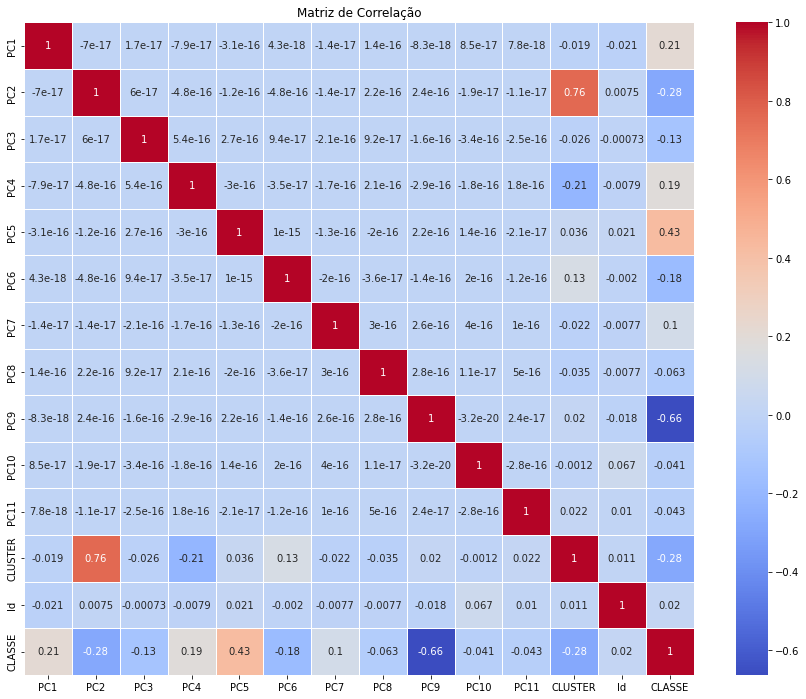

In [3959]:
plotar_correlacao(dados_pca)

In [3960]:
X_train = pd.DataFrame(train_data['Id'])

X_train = dados_pca[dados_pca['Id'].isin(X_train['Id'])]

In [3961]:
X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,CLUSTER,Id,CLASSE
0,2.802184,2.592475,0.673837,0.848898,-1.509818,-2.324531,0.903992,-1.406510,-1.007761,-4.589771,2.036665,1,10524,1.0
1,-1.758720,1.460530,0.344513,-1.119774,-0.124332,-0.674225,-0.368909,0.329324,0.501629,0.391026,-0.161503,2,4483,0.0
2,3.629887,-0.594950,0.518579,-0.950662,-1.645365,-1.772656,0.682632,-0.902913,-0.755089,-2.760352,-0.463544,1,15430,1.0
3,0.354028,1.797365,-0.496302,1.056204,0.473604,-1.274032,-0.303344,0.124494,-0.706383,-0.628828,2.076320,2,14309,1.0
4,-0.786378,-0.960460,0.144679,-0.113723,0.335741,-1.106838,-0.176449,0.341348,-0.695752,0.438927,-0.151398,0,3437,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,1.187840,1.645870,-0.906261,-0.179368,-0.101673,-0.546297,-0.828737,1.100946,1.122441,-0.405559,1.552317,1,12739,0.0
5240,-0.074668,-0.829199,0.095382,0.289964,0.185070,0.510490,0.830329,1.208559,-0.817311,0.390147,-0.263541,0,390,1.0
5241,-2.149876,1.241291,0.662507,-0.536707,1.067491,-0.930500,-0.300493,0.651650,-1.021346,-0.314858,-0.122800,2,14869,1.0
5242,0.913842,3.391280,0.648557,5.047624,0.319117,-0.753210,0.270972,1.173324,2.176582,1.766583,-4.032211,1,3249,0.0


In [3962]:
X_test = pd.DataFrame(test_data['Id'])

X_test = dados_pca[dados_pca['Id'].isin(X_test['Id'])]

In [3963]:
y = X_train['CLASSE']
X = X_train.drop(columns=['Id', 'CLASSE'])
X_t = X_test.drop(columns=['Id', 'CLASSE'])

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [3964]:
from sklearn.model_selection import train_test_split

In [3965]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [3966]:
from sklearn.ensemble import RandomForestClassifier

In [3967]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [3968]:
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [3969]:
previsoes_rf = modelo_rf.predict(X_test)

In [3970]:
from sklearn.metrics import accuracy_score

In [3971]:
acuracia = accuracy_score(y_test, previsoes_rf)

# Exibindo a acurácia
print(f'Acurácia do modelo: {acuracia * 100:.2f}%')

Acurácia do modelo: 93.33%


##### Predicao dos testes

In [3972]:
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [3973]:
model_random_forest.fit(X,y)

RandomForestClassifier(random_state=42)

In [3974]:
predicao_random_forest = model_random_forest.predict_proba(X_t)

Regressao logistica

In [3975]:
from sklearn.linear_model import LogisticRegression

In [3976]:
modelo_logistico = LogisticRegression()

In [3977]:
modelo_logistico.fit(X_train, y_train)

LogisticRegression()

In [3978]:
previsoes_rl = modelo_logistico.predict(X_test)

In [3979]:
acuracia = accuracy_score(y_test, previsoes_rl)
print(f'Acurácia do modelo: {acuracia * 100:.2f}%')

Acurácia do modelo: 93.52%


##### Predição dos testes

In [3980]:
model_regressao_logistica = LogisticRegression()

In [3981]:
model_regressao_logistica.fit(X,y)

LogisticRegression()

In [3982]:
predicao_regressao_logistica = model_regressao_logistica.predict_proba(X_t)

RNA

In [3983]:
from sklearn.neural_network import MLPClassifier

In [3984]:
modelo_rn  = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [3985]:
modelo_rn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [3986]:
previsoes_rn = modelo_rn.predict(X_test)

In [3987]:
acuracia = accuracy_score(y_test, previsoes_rn)

print(f'Acurácia do modelo: {acuracia * 100:.2f}%')

Acurácia do modelo: 93.61%


In [3988]:
modelo_redes_neurais  = MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [3989]:
modelo_redes_neurais.fit(X,y)

MLPClassifier(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [3990]:
predicao_redes_neurais = modelo_redes_neurais.predict_proba(X_t)

Aplicaçao do ensemble

In [3991]:
previsao_ensemble = []

for i in range(len(predicao_redes_neurais[:, 0])):
    valor_redes_neurais = predicao_redes_neurais[i, 0]
    valor_random_forest = predicao_random_forest[i, 0]
    valor_regressao_logistica = predicao_regressao_logistica[i, 0]
    
    valores = [valor_redes_neurais, valor_regressao_logistica, valor_regressao_logistica]
    max_valor = max(valores)
    min_valor = min(valores)
    
    count_class_0 = 0
    count_class_1 = 1
    
    if(valor_redes_neurais > 0.5):
        count_class_0 += 1
    else:
        count_class_1 += 1
        
    if(valor_random_forest > 0.5):
        count_class_0 += 1
    else:
        count_class_1 += 1
        
    if(valor_regressao_logistica > 0.5):
        count_class_0 += 1
    else:
        count_class_1 += 1
        
    if(count_class_0 > count_class_1):
        previsao_ensemble.append(max_valor)
    else:
        previsao_ensemble.append(min_valor)
     

In [3992]:
resultado_ensemble = pd.DataFrame(test_data['Id'], columns=['Id'])
resultado_ensemble['Predicted'] = previsao_ensemble

In [3993]:
resultado_ensemble.to_csv('./ensemble/previsao_ensemble.csv', index=False)

In [3994]:
acuracia = accuracy_score(y_test, previsao_ensemble)

print(f'Acurácia do modelo: {acuracia * 100:.2f}%')

ValueError: Found input variables with inconsistent numbers of samples: [1049, 3146]

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.

In [ ]:
dados_errados = X_test[previsoes_rf != y_test]

/home/guilherme/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


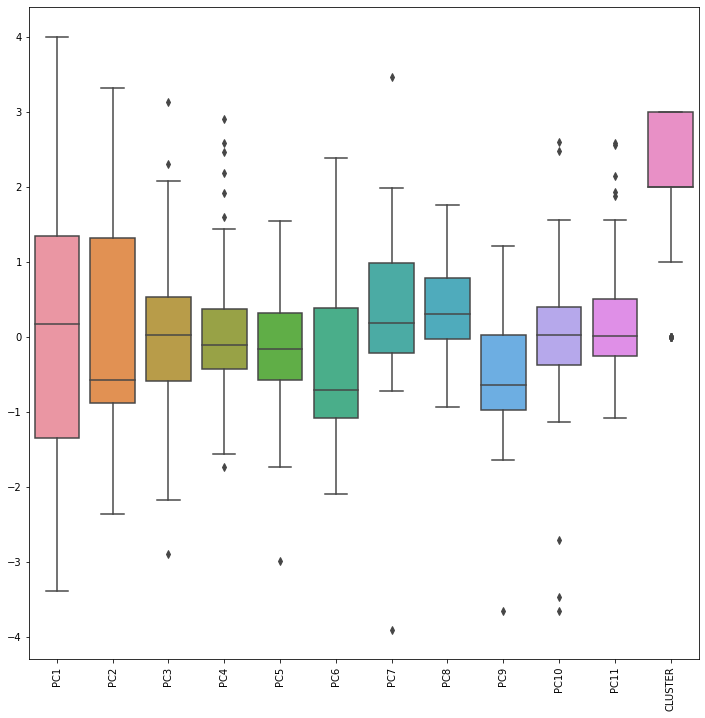

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=dados_errados)  # 'dados' é o DataFrame com seus 12 atributos
plt.xticks(rotation=90)  # Gira os rótulos das colunas para facilitar a leitura
plt.show()